In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
plt.rcParams['figure.figsize'] = [60, 30]

In [3]:
cwd = os.getcwd()
print(cwd)

/Users/default_user/Documents/Hsingchih Tang/Duke/2020 Fall/ECE 588/ece588-f20-invisible-man/src


/Users/default_user/Documents/Hsingchih Tang/Duke/2020 Fall/ECE 588/ece588-f20-invisible-man/src/../data/IM_04.jpg


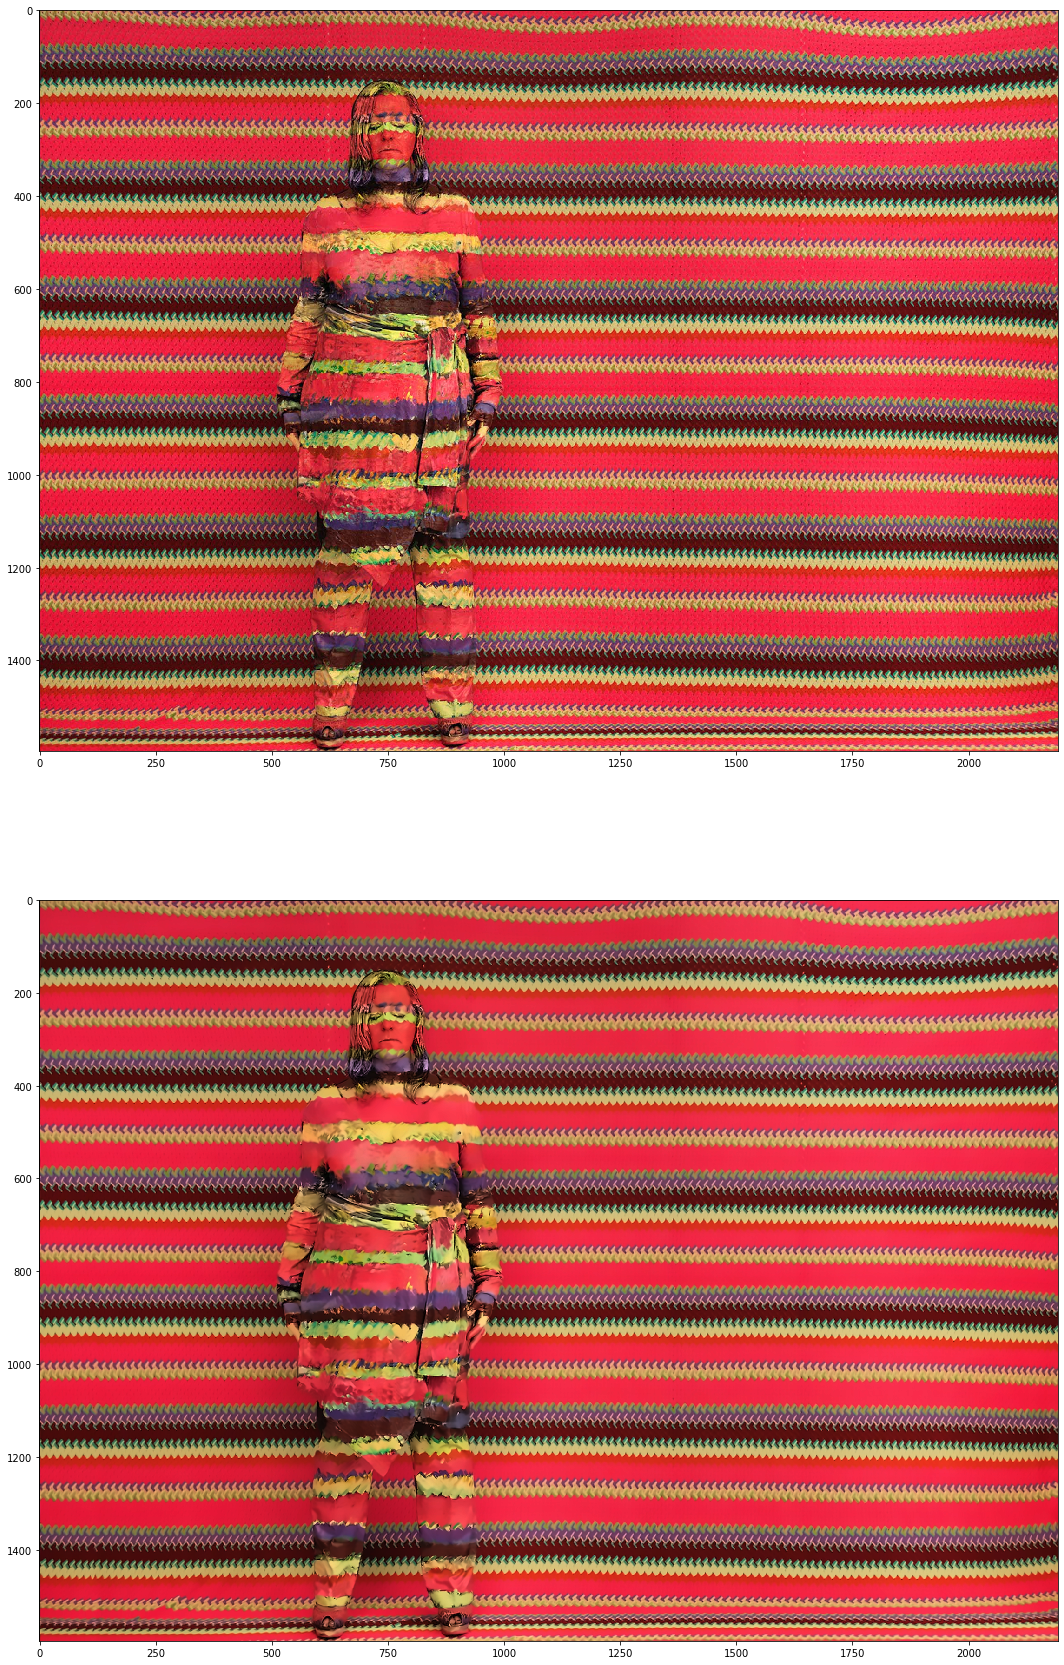

In [21]:
path = cwd+'/../data/IM_04.jpg'
print(path)
img = cv2.imread(path)
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
nlm_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(nlm_img)           # get b,g,r
rgb_nlm_img = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_nlm_img)
plt.show()

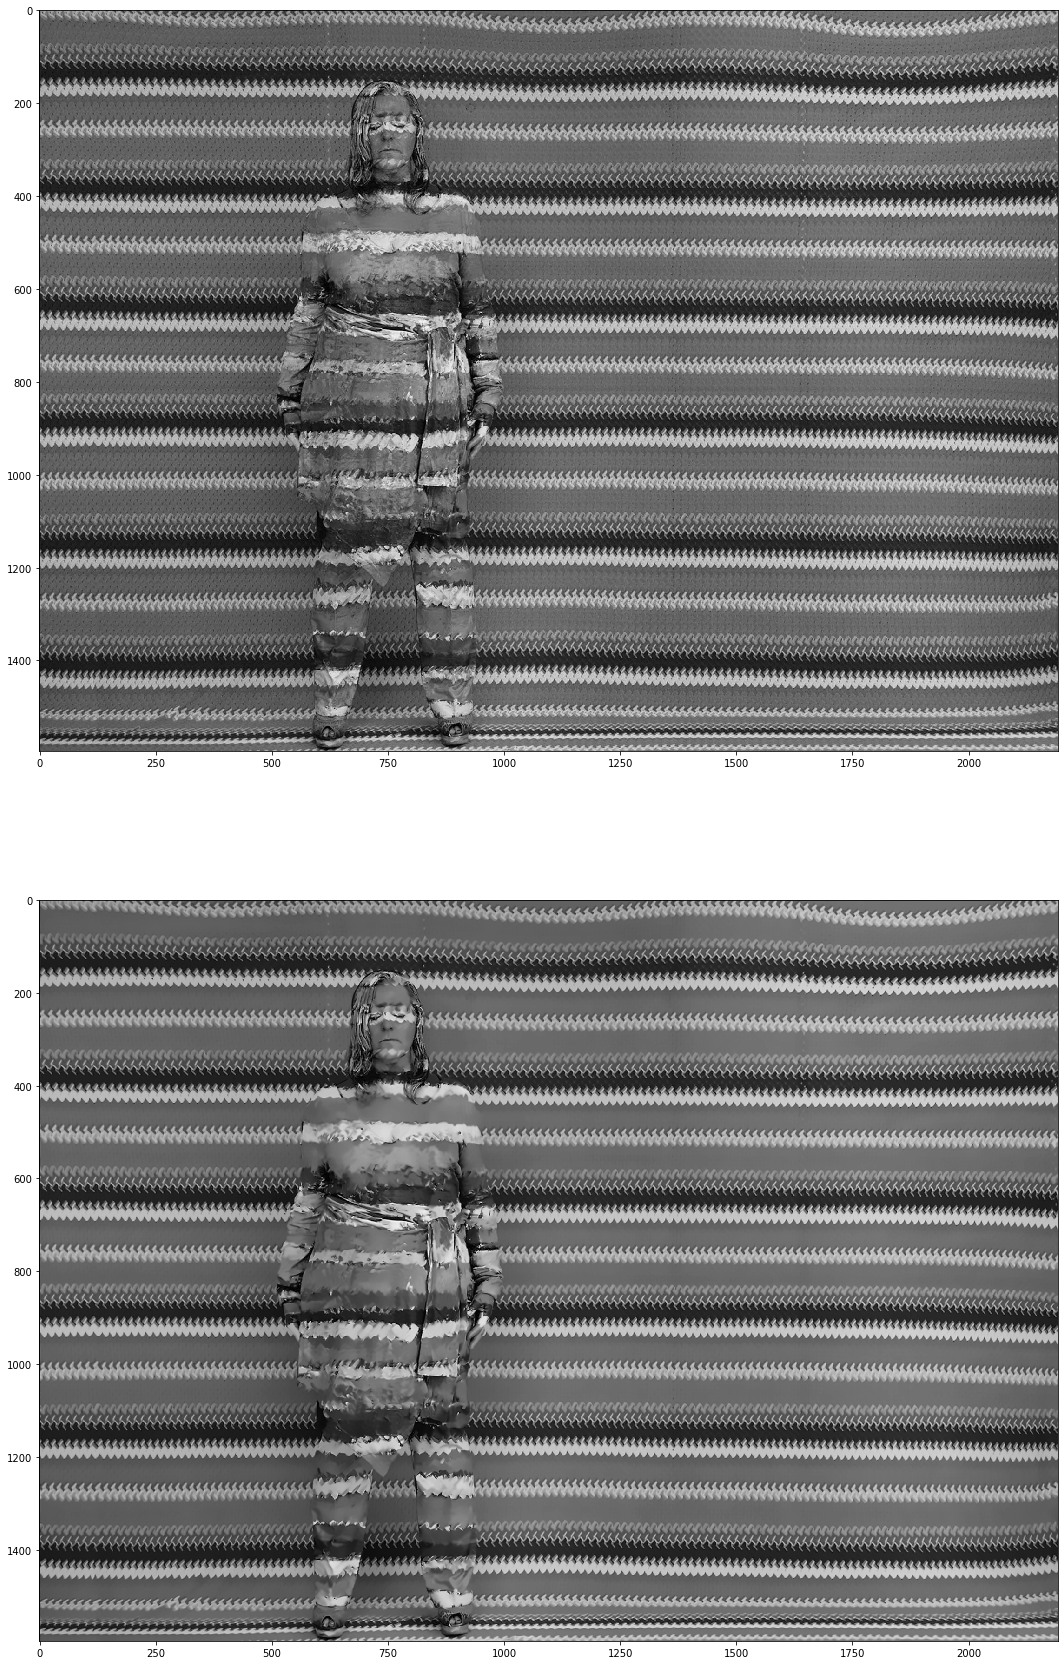

In [22]:
ori_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
denoised_gray = cv2.cvtColor(nlm_img, cv2.COLOR_BGR2GRAY)
plt.subplot(211),plt.imshow(ori_gray, cmap='gray')
plt.subplot(212),plt.imshow(denoised_gray, cmap='gray')
plt.show()

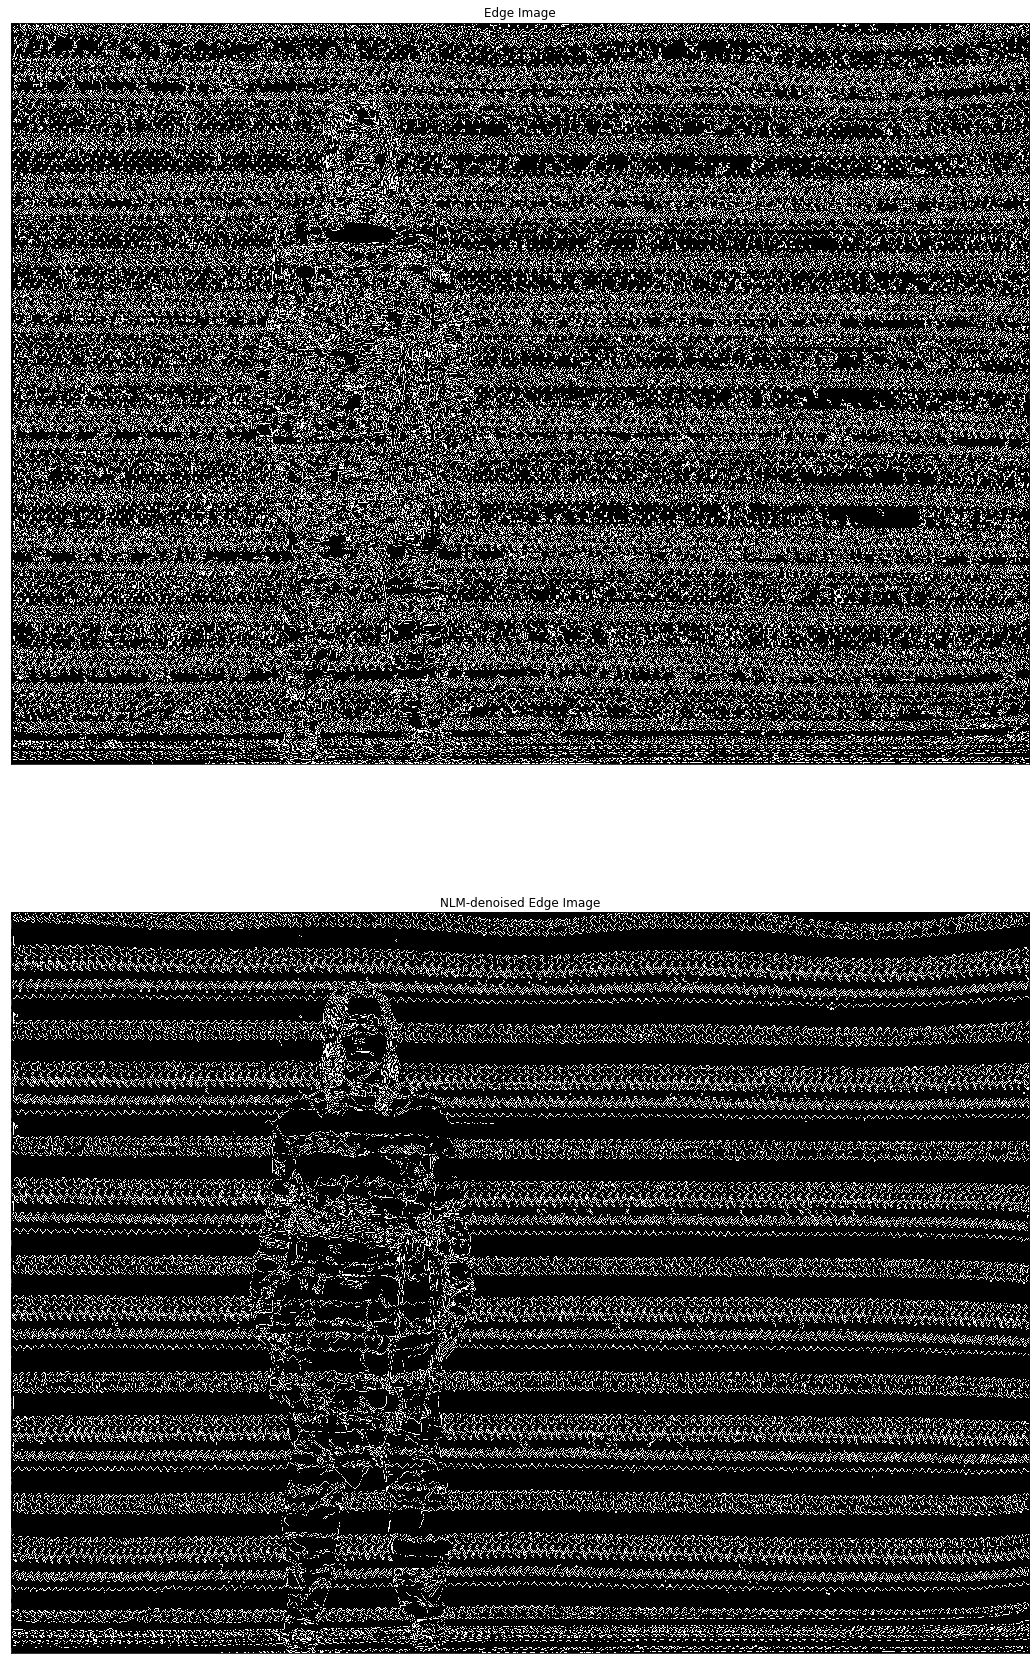

In [23]:
edges = cv2.Canny(img,None,100,200,3,True)
nlm_edges = cv2.Canny(nlm_img,None,100,200,3,True)

plt.subplot(211),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(nlm_edges,cmap = 'gray')
plt.title('NLM-denoised Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
from deepface import DeepFace

In [8]:
path_edge = cwd + '/../data/IM_04_Edge.jpg'
cv2.imwrite(path_edge,nlm_edges)
result = DeepFace.verify(path_edge)
print("Is verified: ", result["verified"])

Using VGG-Face model backend and cosine distance.


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

(Text(0.5, 1.0, 'NLM-denoised Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

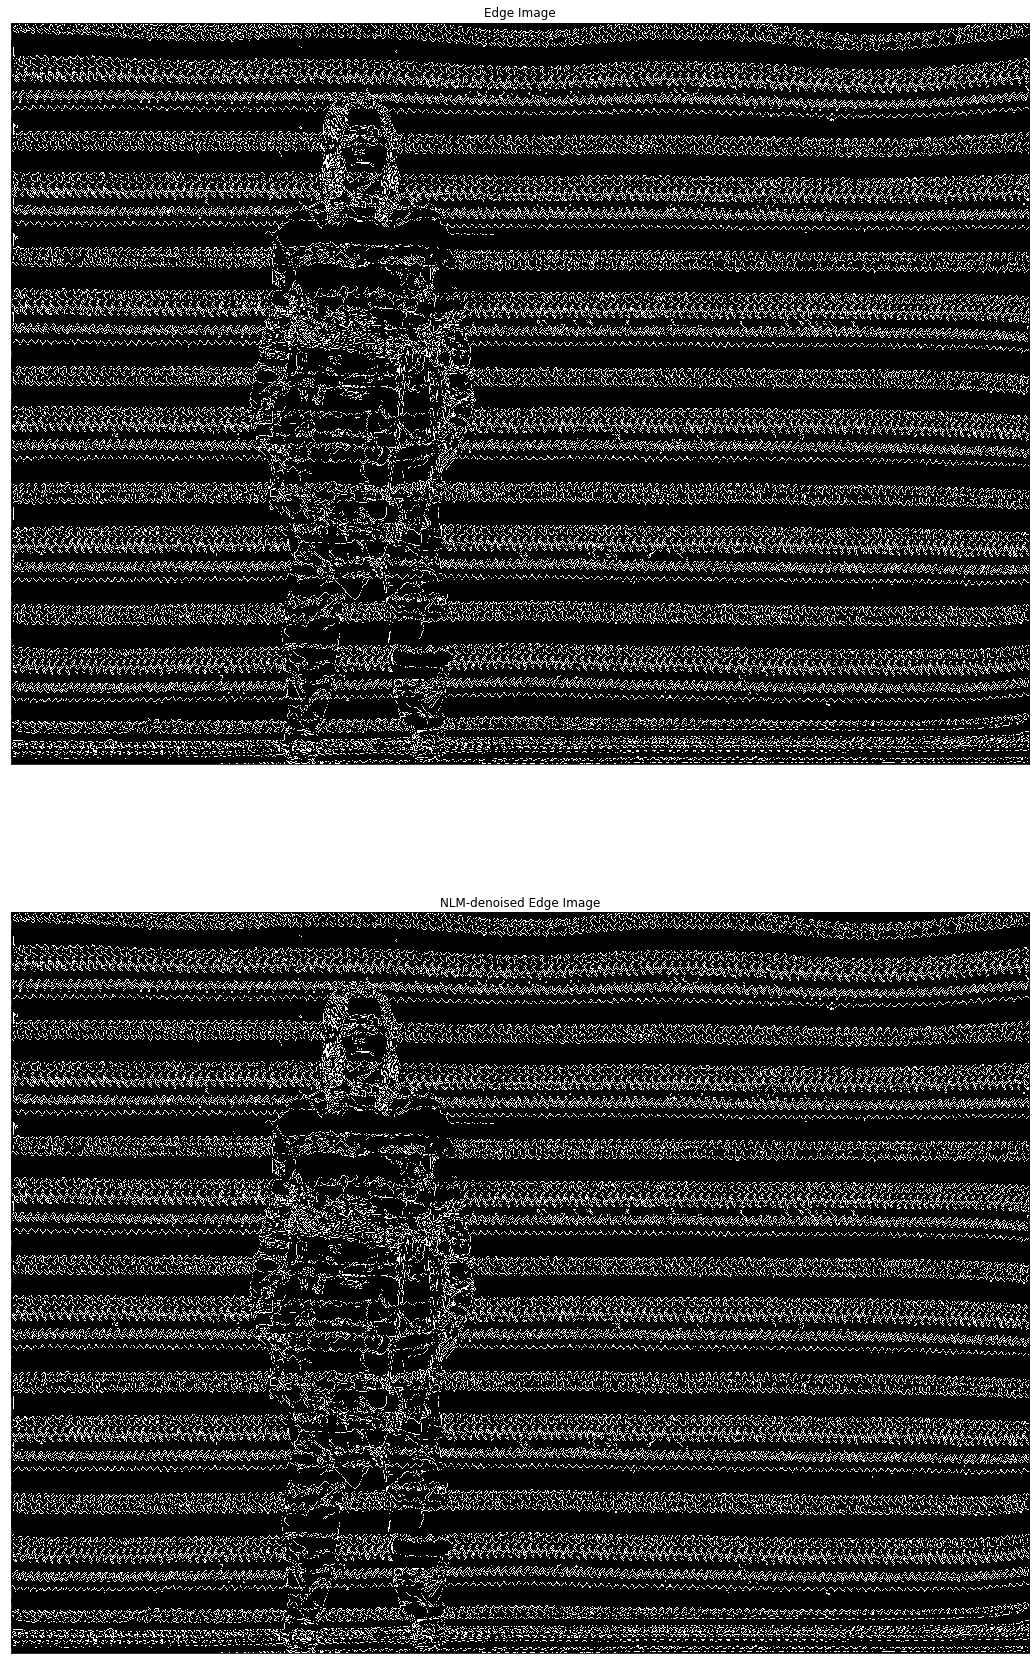

In [13]:
nlm_edges_denoised = cv2.fastNlMeansDenoising(nlm_edges,None,10,21,21)
plt.subplot(211),plt.imshow(nlm_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(nlm_edges_denoised,cmap = 'gray')
plt.title('NLM-denoised Edge Image'), plt.xticks([]), plt.yticks([])